In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Book Recommendation system Project\\Books.csv\\Books.csv"
books = pd.read_csv(file_path)

# Display basic information
print("Dataset loaded. Shape:", books.shape)
print(books.head())

# Preprocessing: Drop duplicates and handle missing values
books = books.drop_duplicates(subset='ISBN')
books = books.dropna(subset=['Book-Title', 'Book-Author'])

# Keep relevant columns for recommendations
books = books[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']]
books = books.reset_index(drop=True)
print("Cleaned dataset. Shape:", books.shape)


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_118516\2169757351.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(file_path)


Dataset loaded. Shape: (271360, 8)
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0

In [4]:
# Combine features into a single string
books['combined_features'] = (
    books['Book-Title'].fillna('') + " " +
    books['Book-Author'].fillna('') + " " +
    books['Publisher'].fillna('')
)

# Display the combined feature
print(books[['Book-Title', 'combined_features']].head())


                                          Book-Title  \
0                                Classical Mythology   
1                                       Clara Callan   
2                               Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic...   
4                             The Mummies of Urumchi   

                                   combined_features  
0  Classical Mythology Mark P. O. Morford Oxford ...  
1  Clara Callan Richard Bruce Wright HarperFlamin...  
2  Decision in Normandy Carlo D'Este HarperPerennial  
3  Flu: The Story of the Great Influenza Pandemic...  
4  The Mummies of Urumchi E. J. W. Barber W. W. N...  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Use TF-IDF Vectorizer to convert text to numerical format
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])

# Fit NearestNeighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

# Function to recommend books using NearestNeighbors
def recommend_books_nn(title, n=5):
    # Get the index of the book
    indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()
    if title not in indices:
        return f"'{title}' not found in the dataset."
    
    idx = indices[title]
    
    # Find nearest neighbors
    distances, neighbors = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    
    # Return recommended books
    recommended = books.iloc[neighbors[0][1:]][['Book-Title', 'Book-Author', 'Publisher']]
    return recommended

# Test the recommendation function
book_title = "Classical Mythology"
recommendations = recommend_books_nn(book_title, n=5)
print(f"Recommendations for '{book_title}':")
print(recommendations)


Recommendations for 'Classical Mythology':
                                               Book-Title         Book-Author  \
111977                                Classical mythology    Mark P.O Morford   
193921                                Classical mythology   Mark P. O Morford   
95231                                 Classical Mythology  Mark P. O. Morford   
205928  Who's Who in Classical Mythology (Who's Who Se...       Michael Grant   
54275                     The Oxford Classical Dictionary    Simon Hornblower   

                      Publisher  
111977                  Longman  
193921                  Longman  
95231     John Wiley &amp; Sons  
205928  Oxford University Press  
54275   Oxford University Press  


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Use TF-IDF Vectorizer to convert text to numerical format
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])

# Fit NearestNeighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

# Function to recommend books using NearestNeighbors
def recommend_books_nn(title, n=5):
    # Get the index of the book
    indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()
    if title not in indices:
        return f"'{title}' not found in the dataset."
    
    idx = indices[title]
    
    # Find nearest neighbors
    distances, neighbors = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    
    # Return recommended books
    recommended = books.iloc[neighbors[0][1:]][['Book-Title', 'Book-Author', 'Publisher']]
    return recommended

# Test the recommendation function
book_title = "Classical Mythology"
recommendations = recommend_books_nn(book_title, n=5)
print(f"Recommendations for '{book_title}':")
print(recommendations)


Recommendations for 'Classical Mythology':
                                               Book-Title         Book-Author  \
111977                                Classical mythology    Mark P.O Morford   
193921                                Classical mythology   Mark P. O Morford   
95231                                 Classical Mythology  Mark P. O. Morford   
205928  Who's Who in Classical Mythology (Who's Who Se...       Michael Grant   
54275                     The Oxford Classical Dictionary    Simon Hornblower   

                      Publisher  
111977                  Longman  
193921                  Longman  
95231     John Wiley &amp; Sons  
205928  Oxford University Press  
54275   Oxford University Press  


In [4]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Load your dataset
books = pd.read_csv("C:\\Book Recommendation system Project\\Books.csv\\Books.csv")

# Combine features into a single string (ensure no missing values)
books['combined_features'] = (
    books['Book-Title'].fillna('') + " " +
    books['Book-Author'].fillna('') + " " +
    books['Publisher'].fillna('')
)

# Use TF-IDF Vectorizer to convert text to numerical format
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])

# Fit NearestNeighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

# Save TF-IDF Vectorizer and NearestNeighbors Model
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(nn_model, 'nearest_neighbors_model.pkl')

print("Models saved successfully!")


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_82436\1601683430.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("C:\\Book Recommendation system Project\\Books.csv\\Books.csv")


Models saved successfully!


In [5]:
# Load the saved models
tfidf = joblib.load('tfidf_vectorizer.pkl')
nn_model = joblib.load('nearest_neighbors_model.pkl')

print("Models loaded successfully!")


Models loaded successfully!


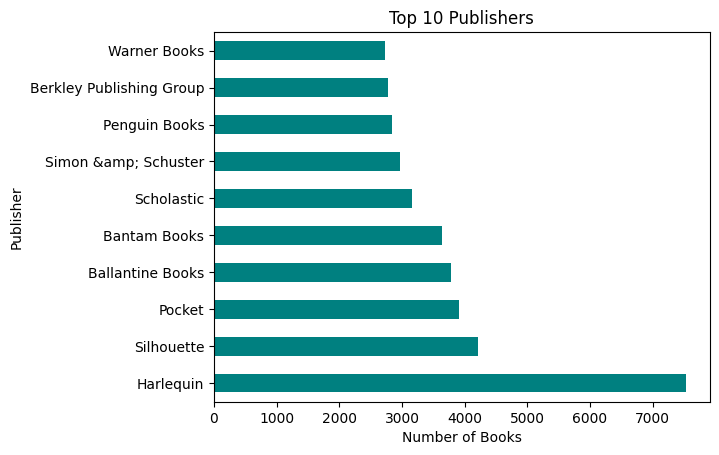

In [6]:
import matplotlib.pyplot as plt

# Analyze the top publishers
top_publishers = books['Publisher'].value_counts().head(10)
top_publishers.plot(kind='barh', color='teal', title='Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()
